In [47]:
#HW12
#News Headlines Sentiment
#Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin.

#Use descriptive statistics to answer the following questions:

#Which coin had the highest mean positive score?
#Which coin had the highest negative score?
#Which coin had the highest positive score?

In [48]:
#Import Libraries and Packages
import pandas as pd
import os
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
%matplotlib inline
from newsapi import NewsApiClient

In [49]:
#Load API key
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [50]:
#Create NEWSapi client
newsapi = NewsApiClient(api_key=api_key)

In [51]:
#Get articles on Bitcoin
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)

In [52]:
#Get articles on Ethereum
eth_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by="relevancy"
)

In [53]:
#Create Bitcoin sentiment scores DF
sentiments = []

for articles in btc_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...
1,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...
3,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi..."
4,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...


In [54]:
#Create ethereum sentiment scores DF
sentiments = []

for articles in eth_headlines["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(sentiments)
eth.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.0,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...
2,0.6808,0.0,0.838,0.162,PayPal is rolling out cryptocurrency support l...
3,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...


In [55]:
#Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.098720,0.039850,0.892050,0.068050
std,0.467325,0.071038,0.092515,0.070392
min,-0.718400,0.000000,0.716000,0.000000
25%,-0.068300,0.000000,0.836250,0.000000
50%,0.051350,0.000000,0.893500,0.056000
75%,0.361125,0.064250,0.969250,0.111000
max,0.822500,0.215000,1.000000,0.229000


In [56]:
#Describe the Ethereum Sentiment
eth.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.278795,0.020158,0.885316,0.094526
std,0.385301,0.054009,0.108499,0.090874
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.855500,0.026500
50%,0.226300,0.000000,0.912000,0.083000
75%,0.526450,0.000000,0.973500,0.125000
max,0.946800,0.196000,1.000000,0.318000


In [57]:
#Questions:
print("Which coin had the highest mean positive score?")
print("Ethereum")

Which coin had the highest mean positive score?
Ethereum


In [58]:
#Questions:
print("Which coin had the highest compound score?")
print("Bitcoin")

Which coin had the highest compound score?
Bitcoin


In [59]:
#Questions:
print("Which coin had the highest positive score?")
print("Bitcoin")

Which coin had the highest positive score?
Bitcoin


In [60]:
# Tokenizer

#In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
#1. Lowercase each word
#2. Remove Punctuation
#3. Remove Stopwords

In [61]:
#Import packages and libraries
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [62]:
wnl = WordNetLemmatizer() 
stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [63]:
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)

    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [64]:
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6705,0.199,0.737,0.064,A former Microsoft software engineer from Ukra...,"[former, Microsoft, software, engineer, Ukrain..."
1,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[PayPal, partnered, cryptocurrency, company, P..."
2,0.2144,0.000,0.947,0.053,PayPal is bringing its newly-announced support...,"[PayPal, bringing, newly-announced, support, c..."
3,0.2263,0.000,0.951,0.049,"Two days ago, about $1 billion worth of bitcoi...","[Two, day, ago, 1, billion, worth, bitcoin, sa..."
4,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[PayPal, rolling, cryptocurrency, support, lat..."


In [65]:
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.0,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[PayPal, partnered, cryptocurrency, company, P..."
1,0.2144,0.0,0.947,0.053,PayPal is bringing its newly-announced support...,"[PayPal, bringing, newly-announced, support, c..."
2,0.6808,0.0,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[PayPal, rolling, cryptocurrency, support, lat..."
3,0.8779,0.0,0.682,0.318,"PayPal has launched the Generosity Network, a ...","[PayPal, launched, Generosity, Network, platfo..."
4,0.0000,0.0,1.000,0.000,FILE PHOTO: A worker pushing a trolley walks w...,"[FILE, PHOTO, worker, pushing, trolley, walk, ..."


In [66]:
# NGrams and Frequency Analysis

#In this section you will look at the ngrams and word frequency for each coin. 

#1. Use NLTK to produce the n-grams for N = 2. 
#2. List the top 10 words for each coin. 

In [67]:
#Import packages and libraries
from collections import Counter
from nltk import ngrams

In [68]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'PayPal'), 3),
 (('poster', 'participating'), 3),
 (('former', 'Microsoft'), 2),
 (('Microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'Ukraine'), 2),
 (('Ukraine', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'year'), 2),
 (('year', 'prison'), 2),
 (('prison', 'stealing'), 2),
 (('stealing', '10'), 2),
 (('10', 'million'), 2),
 (('million', 'store'), 2),
 (('store', 'credit'), 2),
 (('credit', 'Microsoft'), 2),
 (('1', 'billion'), 2),
 (('Silk', 'Road'), 2),
 (('first', 'time'), 2),
 (('virtual', 'currency'), 2)]

In [69]:
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('buy', 'sell'), 4),
 (('char', 'LONDON'), 4),
 (('LONDON', 'Reuters'), 4),
 (('char', 'PayPal'), 3),
 (('Reuters', 'PayPal'), 3),
 (('PayPal', 'Holdings'), 3),
 (('Holdings', 'Inc'), 3),
 (('joined', 'cryptocurrency'), 3),
 (('cryptocurrency', 'market'), 3),
 (('market', 'Wednesday'), 3),
 (('Wednesday', 'allowing'), 3),
 (('allowing', 'customer'), 3),
 (('customer', 'buy'), 3),
 (('sell', 'hold'), 3),
 (('hold', 'bitcoin'), 3),
 (('bitcoin', 'virtual'), 3),
 (('virtual', 'coin'), 3),
 (('coin', 'using'), 3),
 (('using', 'U.S.'), 3),
 (('U.S.', 'digital'), 3)]

In [70]:
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [71]:
#Get top 10 words
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 6),
 ('bitcoin', 6),
 ('Bitcoin', 6),
 ('PayPal', 5),
 ('Microsoft', 4),
 ('first', 4),
 ('1', 4),
 ('’', 4),
 ('currency', 4)]

In [72]:
#Get top 10 words
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('PayPal', 10),
 ('cryptocurrency', 10),
 ('Wednesday', 6),
 ('Reuters', 6),
 ('U.S.', 5),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5),
 ('support', 4)]

In [73]:
#Word Clouds

#In this section, you will generate word clouds for each coin to summarize the news for each coin

In [74]:
#Import packages and libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [75]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

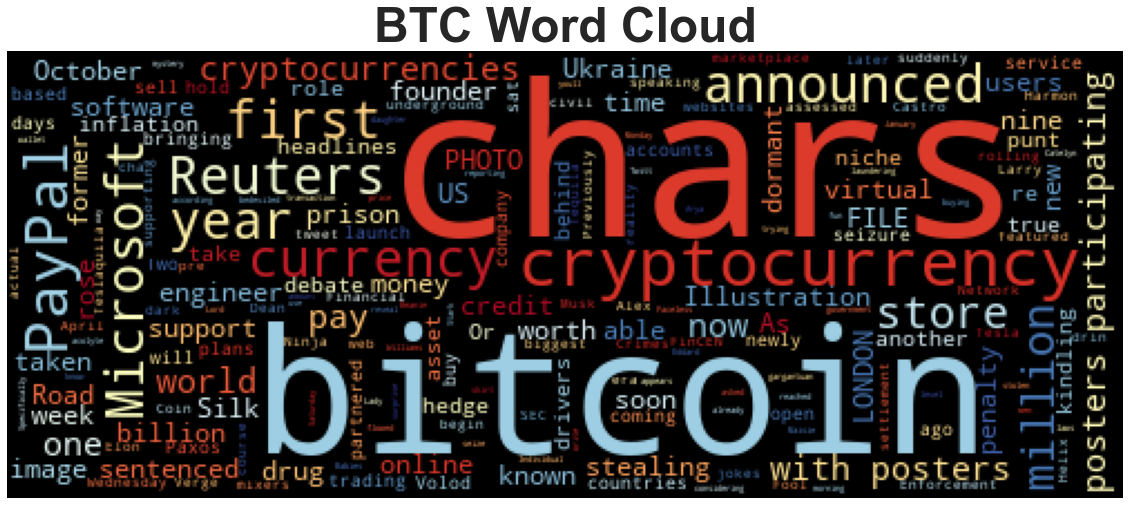

In [76]:
wordcloud(btc.text.str.cat(), title="BTC Word Cloud")

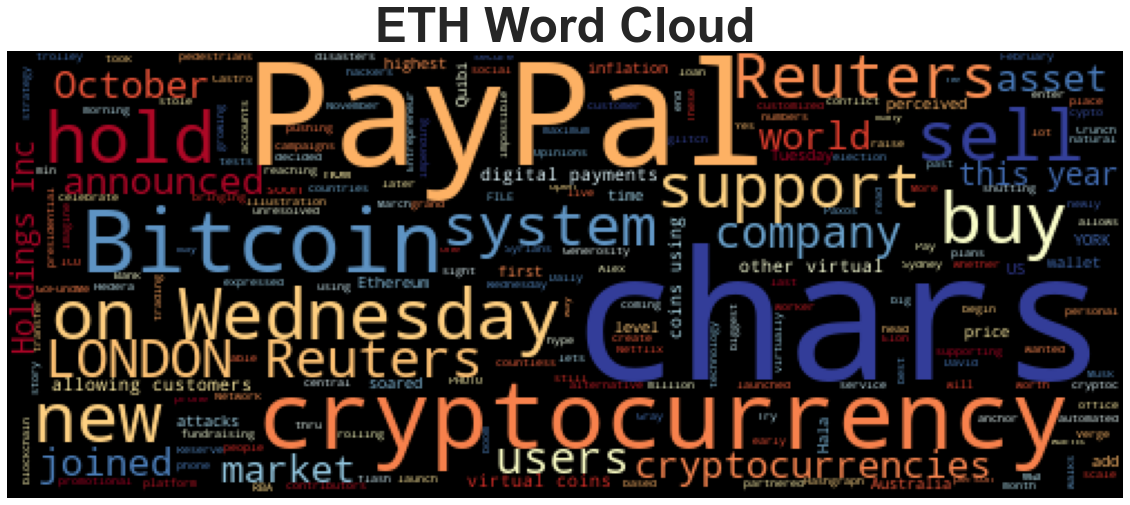

In [77]:
wordcloud(eth.text.str.cat(), title="ETH Word Cloud")

In [78]:
# Named Entity Recognition

#In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [79]:
#Import packages and libraries
import spacy
from spacy import displacy

In [80]:
#Load spaCy model
nlp = spacy.load('en_core_web_sm')

In [81]:
#Concat bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

'A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft\'s online store. From 2016 to 2018, Volod… [+3307 chars]PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]Two days ago, about $1 billion worth of bitcoin that had sat dormant since the seizure of the Silk Road marketplace in 2013, one of the biggest underground drug websites on the dark web, suddenly cha… [+1297 chars]PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it w

In [82]:
#Run NER processor on all text
doc = nlp(all_btc_text)

#Add title to document
doc.user_data["title"] = "Bitcoin NER"

In [83]:
#Render visualization
displacy.render(doc, style='ent', jupyter=True)

In [84]:
#List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
+3307 chars]PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
US GPE
first ORDINAL
US GPE
October DATE
days ago DATE
about $1 billion MONEY
bitcoin GPE
the Silk Road FAC
2013 DATE
one CARDINAL
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
chars]The Financial Crimes Enforcement Network ORG
$60 million MONEY
Larry Dean Harmon PERSON
Helix GPE
Coin Ninja ORG
first ORDINAL
chars]2018 ORG
2020 DATE
Tesla Tequila ORG
April DATE
Elon Musk ORG
Teslaquila WORK_OF_ART
U.S. GPE
Individual X WORK_OF_ART
chars]4 CARDINAL
4 CARDINAL
one CARDINAL
above $14,000 MONEY
Saturday DATE
morning TIME
first ORDINAL
January 2018 DATE
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
bitcoin GPE
Reuters ORG
Beanie Babies WORK_OF_ART
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
chars]1

In [85]:
#Concat all bitcoin text together
all_eth_text = eth.text.str.cat()
all_eth_text

'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]PayPal is rolling out cryptocurrency support later this year\r\nIllustration by Alex Castro / The Verge\r\nPayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars]PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, just like you can on GoFundMe.\xa0\r\nYou can raise a maximum of $20,000… [+1601 chars]FILE PHOTO: A worker pushing a trolley walks with pedestrians past the Reserve Bank of Australia (RBA) head office in central Sydney,

In [86]:
#Run NER processor on all text
eth_doc = nlp(all_eth_text)

In [87]:
#Add title to document
eth_doc.user_data["title"] = "Ethereum NER"

In [88]:
#Render visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [89]:
#List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

PayPal ORG
Paxos ORG
PayPal PRODUCT
U.S. GPE
US GPE
first ORDINAL
US GPE
October DATE
later this year DATE
Alex Castro PERSON
The Verge
 ORG
Wednesday DATE
first ORDINAL
the Generosity Network ORG
20,000 MONEY
the Reserve Bank of Australia ORG
Sydney GPE
Australia GPE
March 7, 2017 DATE
David Gray PERSON
World News ORG
Reuters ORG
2020 DATE
U.S. GPE
Wednesday DATE
morning TIME
Elon Musk WORK_OF_ART
Quibi ORG
PayPal PRODUCT
Netflix PERSON
Daily Crunch WORK_OF_ART
October 21, 2020 DATE
early February this year DATE
last month DATE
October DATE
$24 million MONEY
8, 2020 DATE
5 min QUANTITY
ICO ORG
Bitcoin GPE
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON
1 CARDINAL
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
ETH ORG
0.00011 CARDINAL
about 5¢ CARDINAL
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Reuters ORG
PayPal Holdings Inc ORG
Wednesday DATE
U.S. GPE
Tom Wilson PERSON
Chavez-Dreyfuss PERSON
LONDON 